In [3]:
import pandas as pd
import numpy as np

# Data Handling

## Loading in data

In [4]:
X_train = np.loadtxt('data/train_data_set.csv', delimiter=',', skiprows=1)
X_test = np.loadtxt('data/test_data_set.csv', delimiter=',', skiprows=1)
y_train = np.loadtxt('data/train_label_set.csv', delimiter=',', skiprows=1).ravel()
y_test = np.loadtxt('data/test_label_set.csv', delimiter=',', skiprows=1).ravel()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12699, 784), (2166, 784), (12699,), (2166,))

## Testing the function

In [5]:
from handle_data import load_data
X_train, y_train, X_test, y_test = load_data('data')
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12699, 784), (2166, 784), (12699,), (2166,))

## Exploring the data

Text(0.5, 1.0, '0.0')

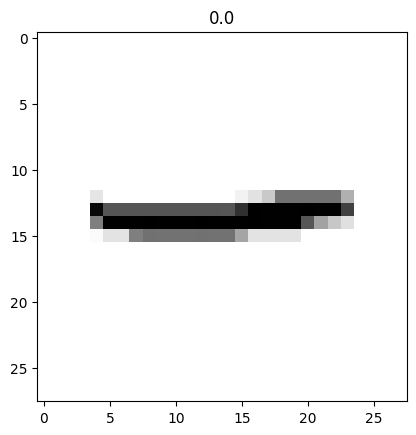

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1100].reshape((28,28)),cmap='binary')
plt.title(f'{y_train[1100]}')

# Machine Learning

## Testing the ml.py

In [1]:
from handle_data import load_data
import ml as ml
import numpy as np

X_train, y_train, X_test, y_test = load_data('data')

input_size = X_train.shape[1]

zeroth_layer = ml.Layer(input_size, input_size)
first_layer = ml.Layer(input_size, 100)
second_layer = ml.Layer(100,10)
third_layer = ml.Layer(10,1)

a_0 = zeroth_layer.forward(X_train.T)
a_1 = first_layer.forward(a_0)
a_2 = second_layer.forward(a_1)
a_3 = third_layer.forward(a_2)



a_2.shape, first_layer.W.shape, a_0.shape, first_layer.b.shape

((10, 12699), (100, 784), (784, 12699), (100, 1))

In [2]:
from handle_data import load_data
import ml as ml
import numpy as np

X_train, y_train, X_test, y_test = load_data('data')

input_size = X_train.shape[1]

model = ml.NeuralNetwork([input_size, 100, 100, 1], ['relu', 'relu', 'relu'])
model.train(X_train.T, y_train.reshape(1,-1), epochs=100, cost_fn='l1_reg_mse',reg_lambda=0)

Epoch 0; Loss 150030.05542690514


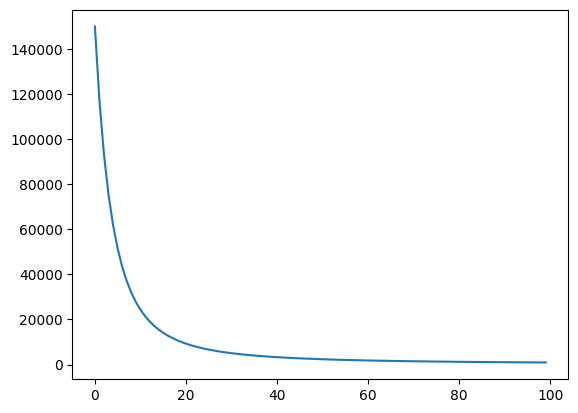

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.training_cache.keys(), model.training_cache.values())
